In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
Apple = cv2.imread('C:/Users/Yulia/Desktop/apple.jpg')
Orange = cv2.imread('C:/Users/Yulia/Desktop/orange.jpg')

In [8]:
Apple_rgb = cv2.cvtColor(Apple, cv2.COLOR_BGR2RGB)
Orange_rgb = cv2.cvtColor(Orange, cv2.COLOR_BGR2RGB)

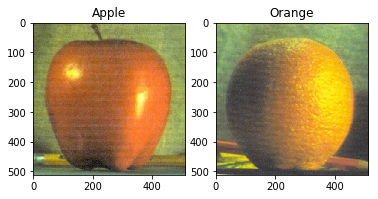

In [16]:
fig, ax = plt.subplots(ncols=2, nrows=1)
ax[0].imshow(Apple_rgb)
ax[0].set_title('Apple')
ax[1].imshow(Orange_rgb)
ax[1].set_title('Orange');

In [19]:
G = Apple.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)
    
G = Orange.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)

In [24]:
len(gpA), gpA[0].shape, gpA[-1].shape

(7, (512, 512, 3), (8, 8, 3))

In [30]:
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)
    if i==3:
        what1 = GE
        what2 = L

lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)

In [40]:
LS = []
for la,lb in zip(lpA,lpB):
    print(rows,cols,dpt)
    ls = np.hstack((la[:,:cols//2], lb[:,cols//2:]))
    LS.append(ls)

16 16 3
32 32 3
64 64 3
128 128 3
256 256 3
512 512 3


In [49]:
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

In [51]:
real = np.hstack((Apple[:,:cols//2],Orange[:,cols//2:]))

In [53]:
arange = cv2.cvtColor(ls_, cv2.COLOR_BGR2RGB)

In [55]:
real_rgb = cv2.cvtColor(real, cv2.COLOR_BGR2RGB)

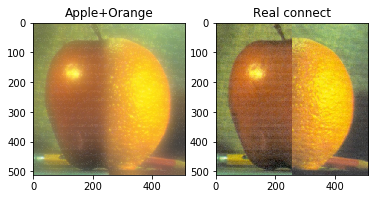

In [57]:
fig, ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(arange)
ax[0].set_title('Apple+Orange')

ax[1].imshow(real_rgb)
ax[1].set_title('Real connect');